# Inspecting the dataset

In [1]:
from collections import Counter

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

train_dataset = datasets.CIFAR10(
    root="../data", train=True, transform=transforms.ToTensor(), download=True
)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=128,
    num_workers=4,
    drop_last=True,
    shuffle=True,
)

test_dataset = datasets.CIFAR10(
    root="../data", train=False, transform=transforms.ToTensor()
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=128,
    num_workers=4,
    drop_last=False,
    shuffle=False,
)

train_counter = Counter()
for images, labels in train_loader:
    train_counter.update(labels.tolist())

test_counter = Counter()
for images, labels in test_loader:
    test_counter.update(labels.tolist())

print("\nTraining label distribution:")
sorted(train_counter.items())

print("\nTest label distribution:")
sorted(test_counter.items())

Files already downloaded and verified

Training label distribution:

Test label distribution:


[(0, 1000),
 (1, 1000),
 (2, 1000),
 (3, 1000),
 (4, 1000),
 (5, 1000),
 (6, 1000),
 (7, 1000),
 (8, 1000),
 (9, 1000)]

# Label Distribution

Training set


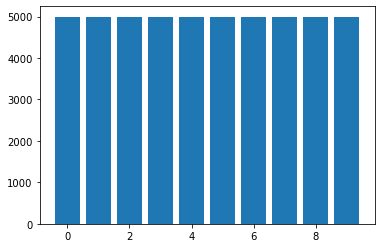

In [2]:
%matplotlib inline
import collections

import matplotlib.pyplot as plt

print("Training set")
plt.bar(train_counter.keys(), train_counter.values())
plt.show()

Test set


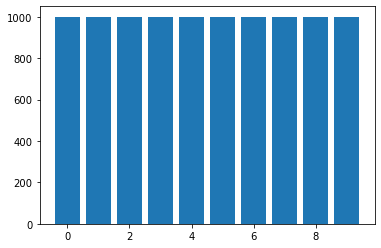

In [3]:
print("Test set")
plt.bar(test_counter.keys(), test_counter.values())
plt.show()

# Performance baseline

- Especially for imbalanced datasets, it's pretty helpful to compute a performance baseline.
- In classification contexts, a useful baseline is to compute the accuracy for a scenario where the model always predicts the majority class -- we want our model to be better than that!

In [4]:
majority_class = test_counter.most_common(1)[0]
print("Majority class:", majority_class[0])

baseline_acc = majority_class[1] / sum(test_counter.values())
print("Accuracy when always predicting the majority class:")
print(f"{baseline_acc:.2f} ({baseline_acc*100:.2f}%)")

Majority class: 3
Accuracy when always predicting the majority class:
0.10 (10.00%)


# A quick visual check

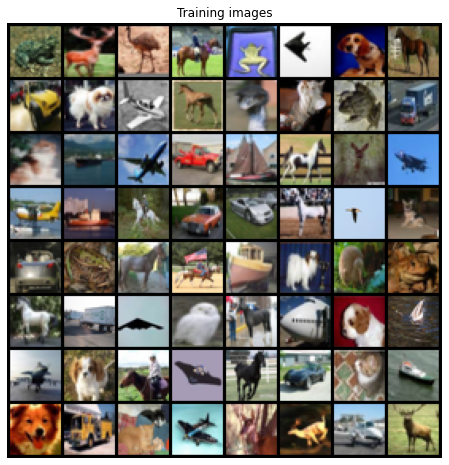

In [5]:
import numpy as np
import torchvision

for images, labels in train_loader:
    break

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(
    np.transpose(
        torchvision.utils.make_grid(images[:64], padding=2, normalize=True), (1, 2, 0)
    )
)
plt.show()